<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_1_Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction to Machine Learning

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from sklearn.linear_model import LinearRegression

from matplotlib.gridspec import GridSpec

from ipywidgets import interact

## 1.1.1 Overview of Machine Learning

### 1.1.1.1 Welcome to machine learning

- **Machine learning** is the science of getting computers to learn without being explicitly programmed.

### 1.1.1.2 Applications of machine learning

- ML is a sub-field of AI
- Web search
- Speech recognition
- Diagnose disease from X-rays
- Self-driving cars
- Computer vision
- Fraud detection
- Augmented reality
- Manufacturing
- Large-scale agriculture
- Health care
- E-commerce
- AGI - Artificial General Intelligence, still a long way from that goal

## 1.1.2 Supervised vs Unsupervised Machine Learning

### 1.1.2.1 What is machine learning?

"Field of study that gives computers the ability to learn without being explicitly programmed."

~ Arthur Samuel (1959)

#### Machine Learning Algorithm Types

1. Supervised learning
    - used most in real-world applications
    - has seen the most rapid advancements and innovations
    - courses 1 and 2 of this specialization
2. Unsupervised learning
    - course 3
3. Recommender systems
    - course 3
4. Reinforcement learning
    - course 3

### 1.1.2.2 Supervised Learning

- $X \implies y$
- $\text{input} \implies \text{label}$
- the **label** is the "right answer"
- when the model is trained, it can predict the **label** given $X$

#### Example Applications: $X \implies y$

- **Spam Filter**: $\text{email} \implies \text{spam? (0/1)}$
- **Speech Recognition**: $\text{audio} \implies \text{text transcript}$
- **Machine Translation**: $\text{English} \implies \text{Spanish}$
- **Online Advertising**: $\text{ad, user info} \implies \text{click? (0/1)}$
- **Self-driving Car**: $\text{image, radar info} \implies \text{position of other cars}$
- **Visual Inspection**: $\text{image of phone} \implies \text{defect? (0/1)}$

#### Regression Example: Housing Price Prediction

- The labels are the actual price (the height of the red X's)
- **Regression** is a particular type of machine learning
    - Predicts a number when there are infinitely many possible outputs
- Is it better to fit this data with a line or a curve?
    - Later in the course we learn how to make that decision

<img src='https://drive.google.com/uc?export=view&id=14lRdkNuT-3pN9u8bDAca-pOs7B2dxCQa'>

#### Classification Example: Breast cancer detection

**NOTE**: For classification, the terms **output class** and **output category** are used interchangeably.

##### Only one input and two output categories

- $\text{tumor size} \implies \text{benign, malignant}$ (0/1)

<img src='https://drive.google.com/uc?export=view&id=1GZIr1Uty7GDvA_erhsIYgqB_h0Sc6ul8'>


##### Only one input and more than two output categories

- $\text{tumor size} \implies \text{benign, malignant type 1, malignant type2}$

<img src='https://drive.google.com/uc?export=view&id=19j2-p29yJh8XwEg22S-iDCWWsF5rfulP'>

##### Two or more inputs

- $\text{tumor size, age} \implies \text{benign, malignant}$
- the algorithm must decide how to fint a **boundary line** through this data

<img src='https://drive.google.com/uc?export=view&id=1bUXYmVKZiQWDd_NZTSyw-8To0I6D9wMc'>

#### Summary: Supervised Learning

- Learns from the "right answers"
- Two Types:
    1. Regression
        - to predict a number
        - infinitely many possible outputs
    2. Classification
        - to predict a category (class)
        - categories can be numbers, but they don't have to be
        - small number of possible output categories

### 1.1.2.3 Unsupervised Learning

- output labels are not provided

<img src='https://drive.google.com/uc?export=view&id=1-4_Y5Wt525WhqNGmDKN82ocTQpgtFQ7Q'>

- the goal of unsupervised learning is to find something interesting in **unlabeled** data.
- an unsupervised learning algorithm might decide that the data can be assigned to two different clusters
    - this is a particular type of unsupervised learning called a **clustering algorithm**

#### Clustering Examples

1. Google News
    - articles are clustered
    - no predetermined key words are known
2. DNA microarray
    - <img src='https://drive.google.com/uc?export=view&id=1fgb3VY9I6fX-kaSMaaCTNOXeWdAgm-QM'>
    - use this data to cluster individuals into different categories
3. Grouping customers
    - many companies have huge databases of customer information
        - this data can be used to cluster customers into different market segments

#### Summary: Unsupervised Learning

- Data only comes with input $X$, but not output labels $y$.
- The algorithm has to find **structure** in the data
- Three types of unsupervised learning covered in this specialization:
    1. Clustering
        - Group similar data points together
    2. Anomaly detection
        - Find unusual data points
            - important for fraud detection
    3. Dimensionality reduction
        - Compress data using fewer numbers while losing as little information as possible

## 1.1.3 Regression Model

### 1.1.3.1 Linear regression model

#### Portland Data

In [2]:
path = 'https://raw.githubusercontent.com/PaulToronto'
path += '/Stanford-Andrew-Ng-Machine-Learning-Specialization/main'
path += '/data/Portland.csv'

portland = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
portland['Price'] = portland['Price'] / 1000.0
portland.shape

(47, 3)

In [3]:
portland.head()

,Size,Bedrooms,Price
0,2104,3,399.9
1,1600,3,329.9
2,2400,3,369.0
3,1416,2,232.0
4,3000,4,539.9


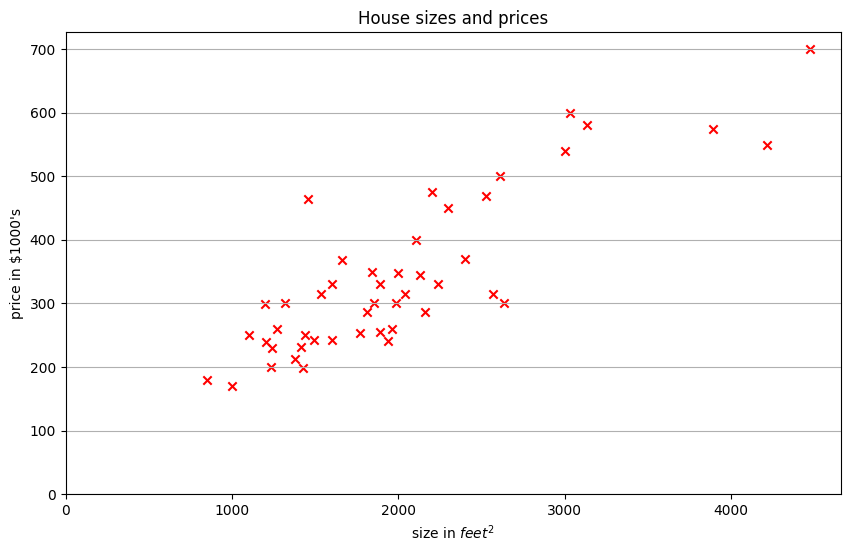

In [4]:
plt.figure(figsize=(10, 6))

plt.scatter(portland['Size'],
            portland['Price'],
            marker='x',
            color='red')

plt.xlim(0)
plt.ylim(0)
plt.grid(axis='y')
plt.title('House sizes and prices')
plt.xlabel('size in ${feet}^2$')
plt.ylabel("price in $1000's")

plt.show()

In [5]:
X = np.array(portland[['Size']])
y = np.array(portland['Price'])

X.shape, y.shape

((47, 1), (47,))

In [6]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
model.intercept_, model.coef_

(71.2704924487291, array([0.13452529]))

In [8]:
fitted = model.predict(X)
fitted.shape, fitted

((47,),
 array([354.31169781, 286.5109528 , 394.13118298, 261.75829986,
        474.84635561, 338.30318857, 277.63228381, 263.23807803,
        256.9153895 , 272.2512723 , 332.24955063, 340.32106789,
        325.52328624, 673.67473086, 241.84855728, 380.67865421,
        248.84387224, 237.54374807, 422.24696811, 479.01663953,
        308.97667585, 325.25423566, 287.04905395, 335.20910696,
        594.57386168, 219.24830894, 267.40836194, 411.08136923,
        367.22612543, 426.01367617, 318.66249657, 205.79578017,
        345.7020794 , 493.27632003, 314.89578851, 264.5833309 ,
        237.94732393, 358.07840587, 638.29458019, 362.1141645 ,
        295.12057122, 372.33808637, 416.59690603, 232.70083771,
        185.88603759, 320.41132531, 233.10441358]))

In [9]:
size_1250_price_prediction = model.coef_ * 1250 + model.intercept_
size_1250_price_prediction

array([239.4271021])

In [10]:
model.predict(np.array([[1250]]))

array([239.4271021])

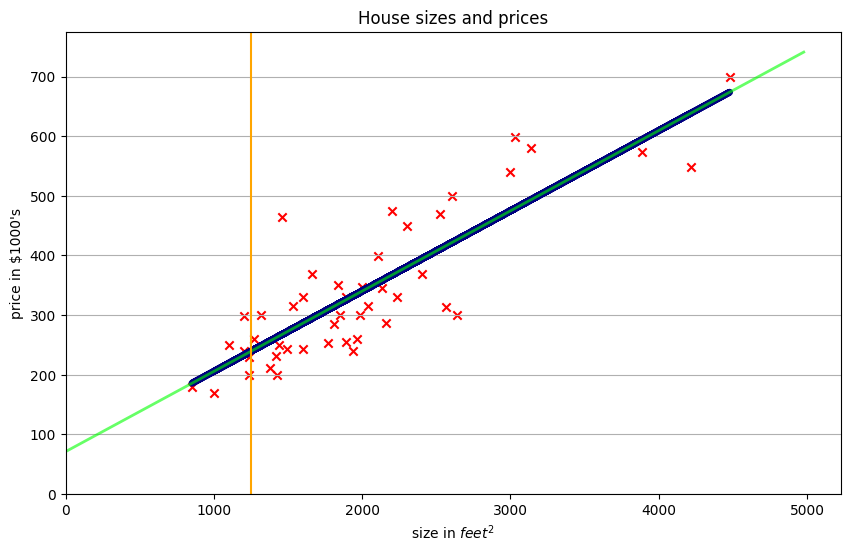

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(X,
            y,
            marker='x',
            color='red')

# regression line - two ways
plt.plot(X,
         fitted,
         color='navy',
         linewidth=5)

x_values = np.linspace(0, X.max() + 500)
plt.plot(x_values,
         model.coef_[0] * x_values + model.intercept_,
         color='lime',
         linewidth=2,
         alpha=0.6)

# prediction for house of 1250 square feet
plt.axvline(x=1250, c='orange')

plt.xlim(0)
plt.ylim(0)
plt.grid(axis='y')
plt.title('House sizes and prices')
plt.xlabel('size in ${feet}^2$')
plt.ylabel("price in $1000's")

plt.show()

#### Terminology

- **Training set**: data that is used to train a model
- $x$ is the input variable, aka *feature*
- $y$ is the output variable, aka *target variable*
- $m$ is the total number of training examples (rows)
- $(x, y)$ denotes a single training example
- $(x^{(i)}, y^{(i)})$ denotes the $i^{th}$ training example, starts at 1
- $w$ is the **weight** parameter
- $b$ is the **bias** parameter
- $f_{w,b}\left(x^{(i)}\right)$ is the result of the model evaluation at $x^{(i)}$ parameterized by $w,b$
    - $f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b$
- $a$ is a scalar
- $\textbf{a}$ is a vector

In [12]:
m = len(portland)
m

47

In [13]:
# x_i, y_i
x_0 = X[0][0] # portland['Size'][0]
y_0 = y[0] # portland['Price'][0]
x_0, y_0,

(2104, 399.9)

#### What does a supervised learning algorithm do with a dataset?

- $\text{training set} \implies \text{machine learning algorithm} \implies \text{model:} f$
---
- Input: training set
    - features
    - targets
- Output from training: function, $f$
    - historically, this function used to be called a **hypothesis**
    - the job of $f$ is to take a new input, $x$ and output an estimate or prediction for $\widehat{y}$
    - $\widehat{y}$ is the estimate or prediction for $y$
    - $y$ is the actual data value in the training set, aka the **target**
    - the function, $f$ is called the **model**

#### How to represent $f$?

- for now, we stick with $f$ being a straight line
    - $f_{w,b}\left(x\right) = wx + b$
- sometimes, $w,b$ is omitted, but it means the same thing
- the name of this model is **linear regression** or more specifically, **linear regression with one variable** or **univariate linear regression**
    - in the Portland example, that one variable is the single feature: the size of the house

### 1.1.3.2 Lab: Model representation

#### Goal

The goal of this lab is to learn to implement the model $f_{w,b}$ for linear regression with one variable.

#### The data and problem statement

This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \$300,000 and a house with 2000 square feet sold for \$500,000. These two points will constitute our data or **training set**. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

In [14]:
train = pd.DataFrame({'Size': [1.0, 2.0],
                     'Price': [300, 500]})
train

,Size,Price
0,1.0,300
1,2.0,500


In [15]:
x_train_0 = np.array(train['Size'])
y_train_0 = np.array(train['Price'])
x_train_0, y_train_0

(array([1., 2.]), array([300, 500]))

#### Number of training examples: $m$

In [16]:
m = x_train_0.shape[0]
m

2

#### Training example: $x^{(i)}, y^{(i)}$

- Python is zero-index, so the first training example has index, $0$.

In [17]:
for i in range(m):

    x_i = x_train_0[i]
    y_i = y_train_0[i]

    print(f'(x^({i}), y^({i})) = ({x_i}, {y_i})')

(x^(0), y^(0)) = (1.0, 300)
(x^(1), y^(1)) = (2.0, 500)


#### Plotting the data

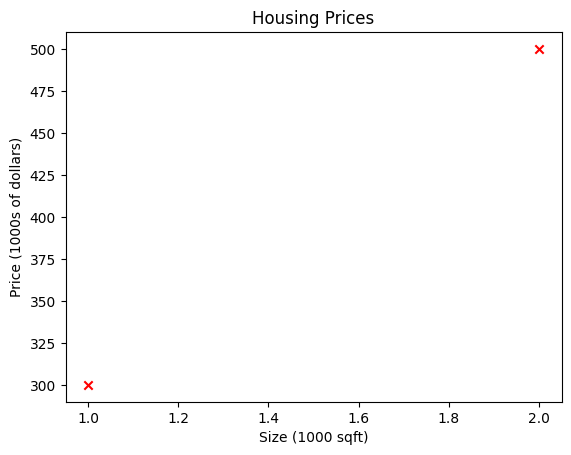

In [18]:
plt.scatter(x_train_0, y_train_0, marker='x', c='r')
plt.title('Housing Prices')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (1000s of dollars)')

plt.show()

#### Model, function $f$

The model function for linear regression is represented as:

$
f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b
$

Different values of $w$ and $b$ represent different straight lines on the plot.

In [19]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray(m,)): Data, m examples
      w,b (scalar).  : model parameters
    Returns
      y (ndarray(m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)

    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

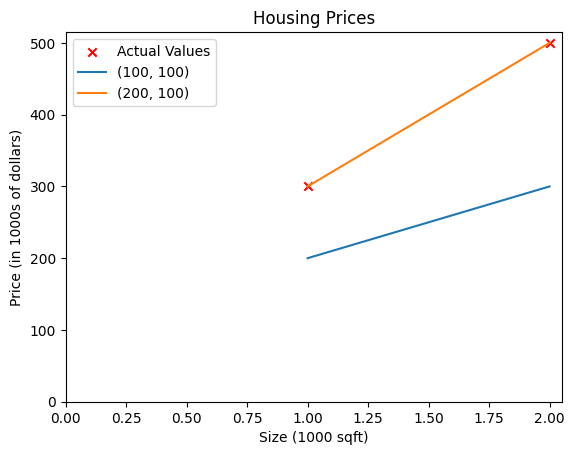

In [20]:
wb_pairs = [(100, 100), (200, 100)]

# plot the data points
plt.scatter(x_train_0, y_train_0, marker='x', c='r', label='Actual Values')

# plot model predictio
for pair in wb_pairs:
    temp_f_wb = compute_model_output(x_train_0, pair[0], pair[1])
    plt.plot(x_train_0, temp_f_wb, label=str(pair))

plt.xlim(0)
plt.ylim(0)
plt.title('Housing Prices')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.legend()

plt.show()

#### Now that we have a model, we can use it to make a prediction

In our model, $w = 200$ and $b = 100$. Predict the cost of a house that is 1200 sqft.

In [21]:
w, b = 200, 100
x_i = 1200 / 1000

cost_1200sqft = w * x_i + b

print(f'The cost of a 1200 sqft house is predicted to be {cost_1200sqft:.0f} thousand dollars')

The cost of a 1200 sqft house is predicted to be 340 thousand dollars


### 1.1.3.3 Cost function formula

- Training set: has features, $x$, and output targets, $y$
- Model: $f_{w,b}\left(x\right) = wx + b$
- Model parameters: $w$ and $b$
    - these parameters are also called: *coefficients* or *weights*
- $w,b$ determine the model, $f$, as shown in the following code:

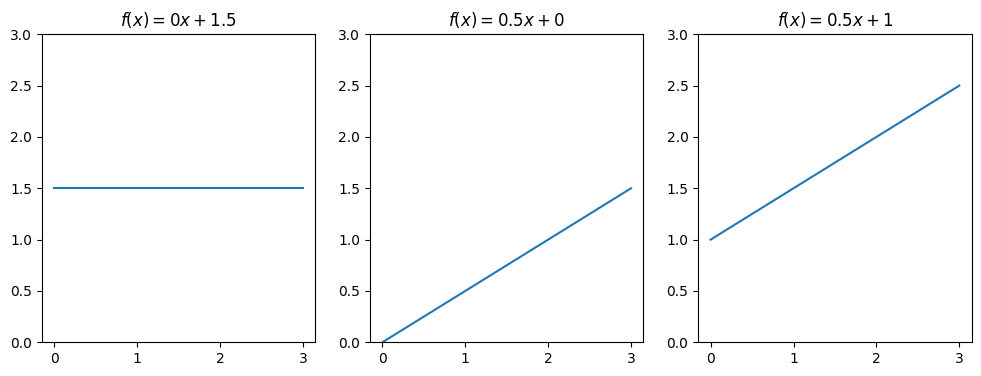

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

domain = np.array([0, 1, 2, 3])
wb_pairs = [(0, 1.5), (0.5, 0), (0.5, 1)]
f_wb = lambda w, b: w * domain + b

for i, pair in enumerate(wb_pairs):
    w = pair[0]
    b = pair[1]
    axes[i].set_title(f'$f(x) = {w}x + {b}$')
    axes[i].plot(domain, f_wb(w, b))
    axes[i].set_ylim([0, 3])

plt.show()

- Recall that the $i^{th}$ training example is represented by $\left(x^{(i)}, y^{(i)}\right)$, where $y^{(i)}$ is the target
- For a given input, $x^{(i)}$, the function, $f$, also makes a predicted value, $\widehat{y}^{(i)}$
    - $\widehat{y}^{(i)} = f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b$
- **Goal**: find values $w$ and $b$ so that $\widehat{y}^{(i)}$ is close to $y^{(i)}$ for all $\left(x^{(i)}, y^{(i)}\right)$

#### Measuring how well a line fits the training data

- To do this, we need a **cost function**
- The **error** for the $i^{th}$ data point is $\widehat{y}^{(i)} - y^{(i)}$
- We want to square this error and measure it across the entire traing set by summing it

$$
\sum_{i=1}^{m}\left(\widehat{y}^{(i)} - y^{(i)}\right)^{2}
$$

- So that the cost function doesn't automatically get larger as the training set size gets larger, we take the average

$$
\frac{1}{m}\sum_{i=1}^{m}\left(\widehat{y}^{(i)} - y^{(i)}\right)^{2}
$$

- However, by convention in the ML community, the division is by $2m$ instead of $m$
    - this cost function still works and it makes later calculations cleaner
- We use $J(w,b)$ to refer to the cost function
- This function is also called the **Squared Error Cost Function**
- In ML different cost functions are used for different applications, but this cost function is the most commonly used for linear regression, and all other regression problems

$$
\begin{align}
J(w,b) &= \frac{1}{2m}\sum_{i=1}^{m}\left(\widehat{y}^{(i)} - y^{(i)}\right)^{2} \\
&= \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}
\end{align}
$$

- We have still not arrived at our goal of finding values for $w$ and $b$ that minimize the cost function, but we will get there after a lecture to build intuition about what it means if $J(w,b)$ is large vs small

### 1.1.3.4 Cost function intuition

#### Recap

- **model**: $f_{w,b}\left(x\right) = wx + b$
- **parameters**: $w, b$
- **cost function**: $J(w,b) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}$
- **goal**: $\text{minimize}_{w,b}\;J(w,b)$

#### Simplified Example: $b = 0$

- **model**: $f_{w}\left(x\right) = wx$
- **parameters**: $w$
- **cost function**: $J(w) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w}\left(x^{(i)}\right) - y^{(i)}\right)^{2}$
- **goal**: $\text{minimize}_{w}\;J(w)$
- **$f$**: defines a line that goes through the origin

- for a fixed $w$, we have a function of $x$: $f_{w}\left(x\right)$
- but $J_{w}$ is a function of $w$


In [23]:
training_data = pd.DataFrame({'x': [1, 2, 3],
                              'y': [1, 2, 3]})
training_data

,x,y
0,1,1
1,2,2
2,3,3


$$
\begin{align}
J(w) &= \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w}\left(x^{(i)}\right) - y^{(i)}\right)^{2} \\
&= \frac{1}{2 \cdot 3}\sum_{i=1}^{3}\left(w \cdot x^{(i)} - y^{(i)}\right)^{2} \\
&= \frac{1}{6} \left(\left(w - 1\right)^{2} + \left(2w - 2\right)^{2} + \left(3w - 3\right)^{2}\right) \\
&= \frac{1}{6}\left(14w^{2} - 28w + 14\right)
\end{align}
$$

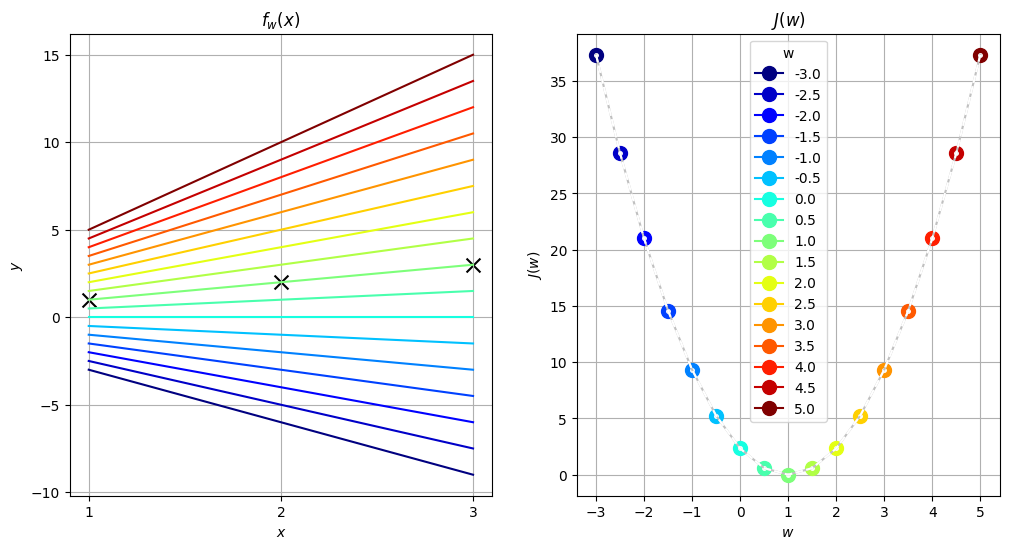

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_xticks([0, 1, 2, 3])
ax1.grid()
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('$f_w(x)$')

ax2.grid()
ax2.set_xlabel('$w$')
ax2.set_ylabel('$J(w)$')
ax2.set_title('$J(w)$')

feature = training_data['x'].values
target = training_data['y'].values

# plot training set
ax1.scatter(feature, target,
            marker='x', color='black', s=100)

# w takes on these values and colours
ws = np.arange(-3, 5.1, 0.5)
colors = plt.cm.jet(np.linspace(0, 1, len(ws)))

# model: w can take on a range of values
f = lambda w: w * feature

# cost function: w can take on a range of values
m = len(training_data)
J = lambda w: (1/(2*m)) * sum((f(w) - target)**2)
J_alt = lambda w: (1/6) * (14 * w**2 - 28 * w + 14)

# plot the model in ax1
# plot the value returned by the cost function in ax2
for i, w in enumerate(ws):
    ax1.plot(feature, f(w), color=colors[i])
    ax2.plot(w, J(w), marker='.', color=colors[i], markersize=20, label=w)
    ax2.plot(w, J_alt(w), marker='.', color='white', markersize=5)

# plot the continuous cost function
ax2.plot(ws, [J(w) for w in ws], color='silver')
ax2.plot(ws, J_alt(ws), linestyle='--', color='white')

plt.legend(title='w')
plt.show()

### 1.1.3.5 Visualizing the cost function

#### Recap

- **model**: $f_{w,b}\left(x\right) = wx + b$
- **parameters**: $w, b$
- **cost function**: $J(w,b) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}$
- **goal**: $\text{minimize}_{w,b}\;J(w,b)$

In [25]:
# housing data
x_train = np.array(portland['Size'])
y_train = np.array(portland['Price'])

# regression line (model)
def f_wb(x, w, b):
    return np.dot(w, x) + b

# cost function
def J_wb(x_train, y_train, w, b):
    m = x_train.shape[0]
    return sum(((np.dot(w, x_train) + b) - y_train)**2) / (2 * m)

In [26]:
def plot_portland_housing(x_train, y_train, w, b):

    # for np.round function
    w = np.float64(w)
    b = np.float64(b)

    fig = plt.figure(figsize=(12, 12))
    gs = GridSpec(3, 2)

    fig.suptitle(f'Model: $f_{{w,b}}(x) = {w.round(2)}x + {b.round(2)}$')

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1:, :], projection='3d')

    # housing data scatter plot
    ax1.scatter(x_train, y_train, marker='x', c='red')
    ax1.set_title('Housing Prices')
    ax1.set_xlabel('Size in ${feet}^2$')
    ax1.set_ylabel('Price in \$1000\'s')

    w_space = np.linspace(-0.5, 0.5, 100)
    b_space = np.linspace(-1000, 1000, 100)
    W_space, B_space = np.meshgrid(w_space, b_space)
    Z_cost = np.zeros_like(W_space)

    # 3D surface plot
    for i in range(W_space.shape[0]):
        for j in range(W_space.shape[1]):
            Z_cost[i, j] = J_wb(x_train, y_train, W_space[i, j], B_space[i, j])
    ax3.plot_surface(W_space, B_space, Z_cost, cmap='Greens', alpha=0.6)
    ax3.plot_wireframe(W_space, B_space, Z_cost, color='k', alpha=0.1)
    ax3.set_title('$J(w,b)$')
    ax3.set_xlabel('$w$')
    ax3.set_ylabel('$b$')
    ax3.set_zlabel('$J(w,b)$')
    ax3.view_init(30, -120)

    # Contour plot
    ax2.contour(W_space, B_space, np.log(Z_cost), levels=17, cmap='Greens')
    ax2.set_title('$J(w,b)$')
    ax2.set_xlabel('$w$')
    ax2.set_ylabel('$b$')

    x = np.linspace(x_train.min(), x_train.max(), 100)
    # regression line
    ax1.plot(x, f_wb(x, w, b), c='dodgerblue')
    # plot (w,b) on contour
    ax2.scatter(w, b, s=100, marker='X', c='dodgerblue')
    # plot (w,b) on 3D surface
    ax3.scatter(w, b, s=100, marker='X', c='dodgerblue')

    print('The cost is : ', J_wb(x_train, y_train, w, b))

In [27]:
# values that minimize cost (as determined by sklearn)
w = model.coef_[0]
b = model.intercept_

from matplotlib.gridspec import GridSpec

### 1.1.3.6 Visualization Examples

The cost is :  39795.51983518085


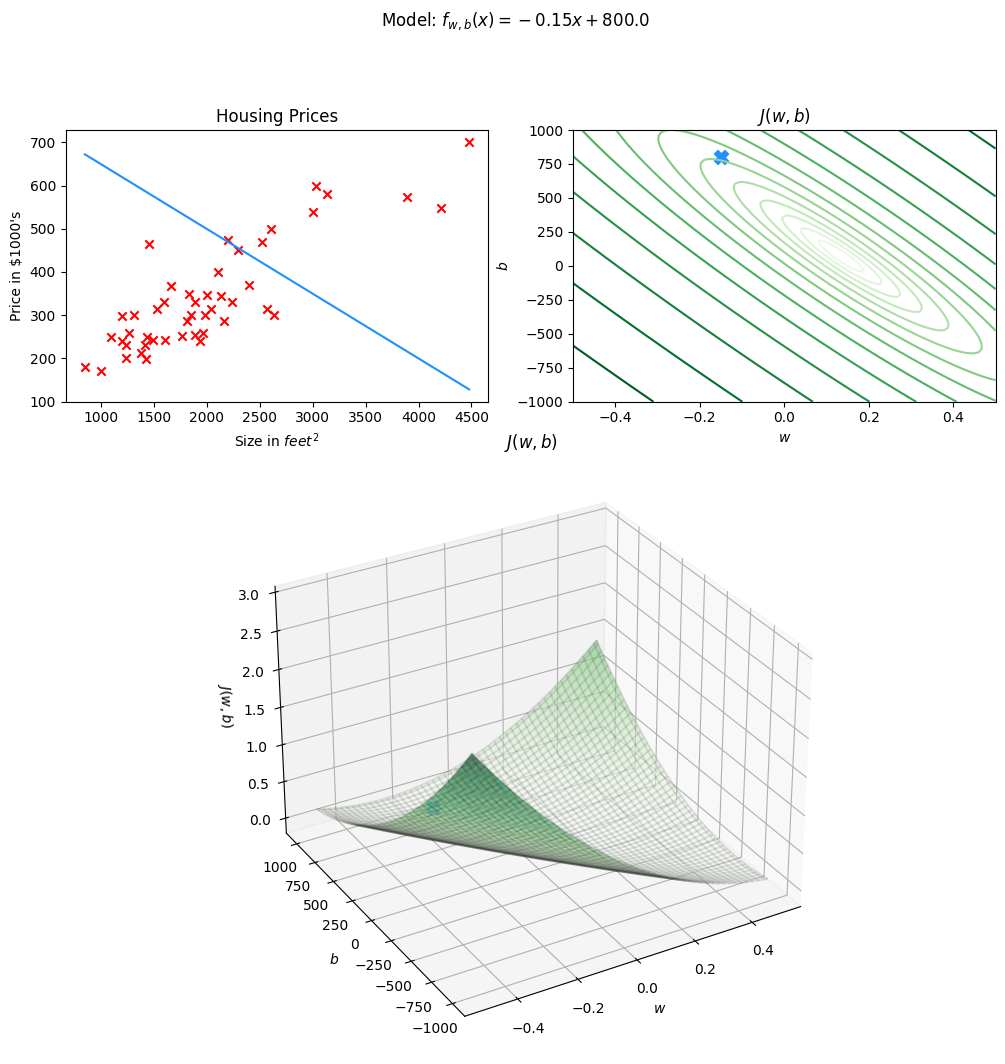

In [28]:
w = -0.15
b = 800

plot_portland_housing(x_train, y_train, w, b)

The cost is :  7842.990659648937


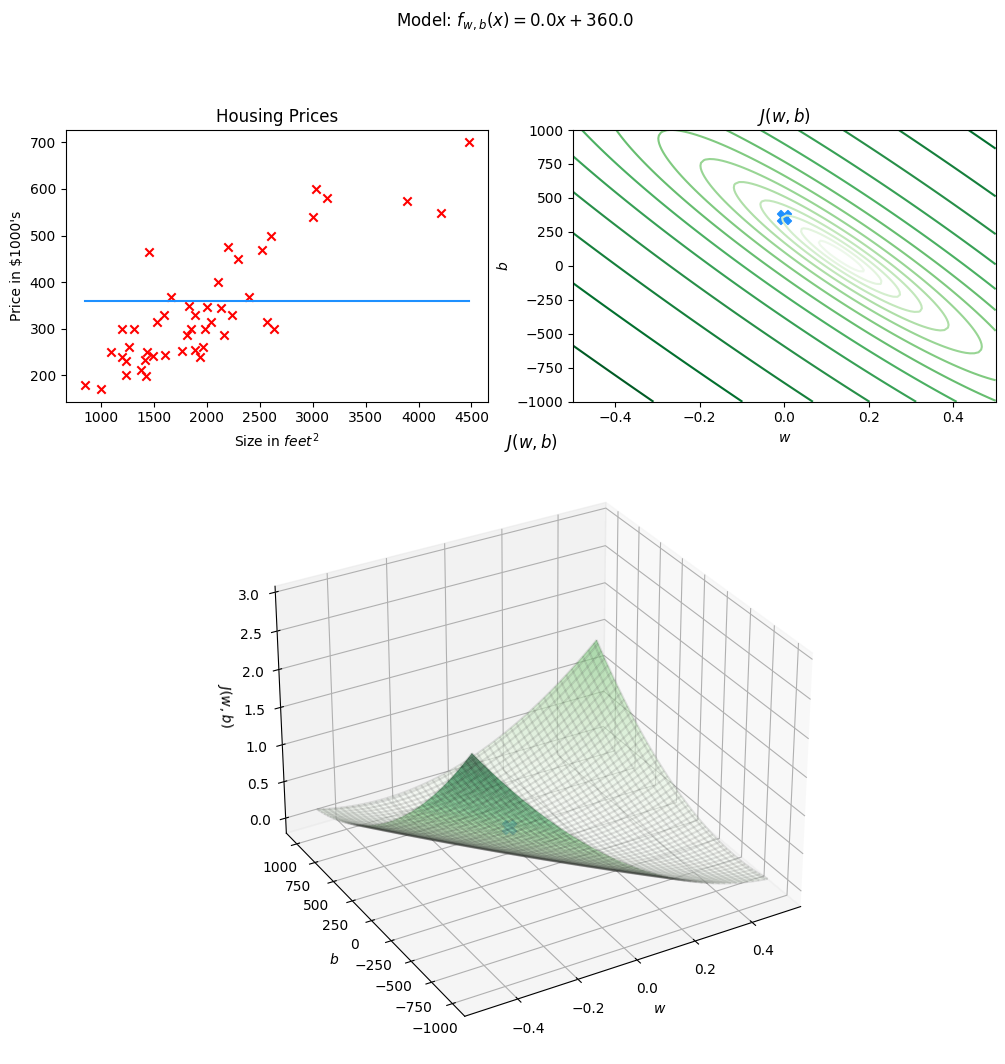

In [29]:
w = 0
b = 360

plot_portland_housing(x_train, y_train, w, b)

The cost is :  36949.95600539361


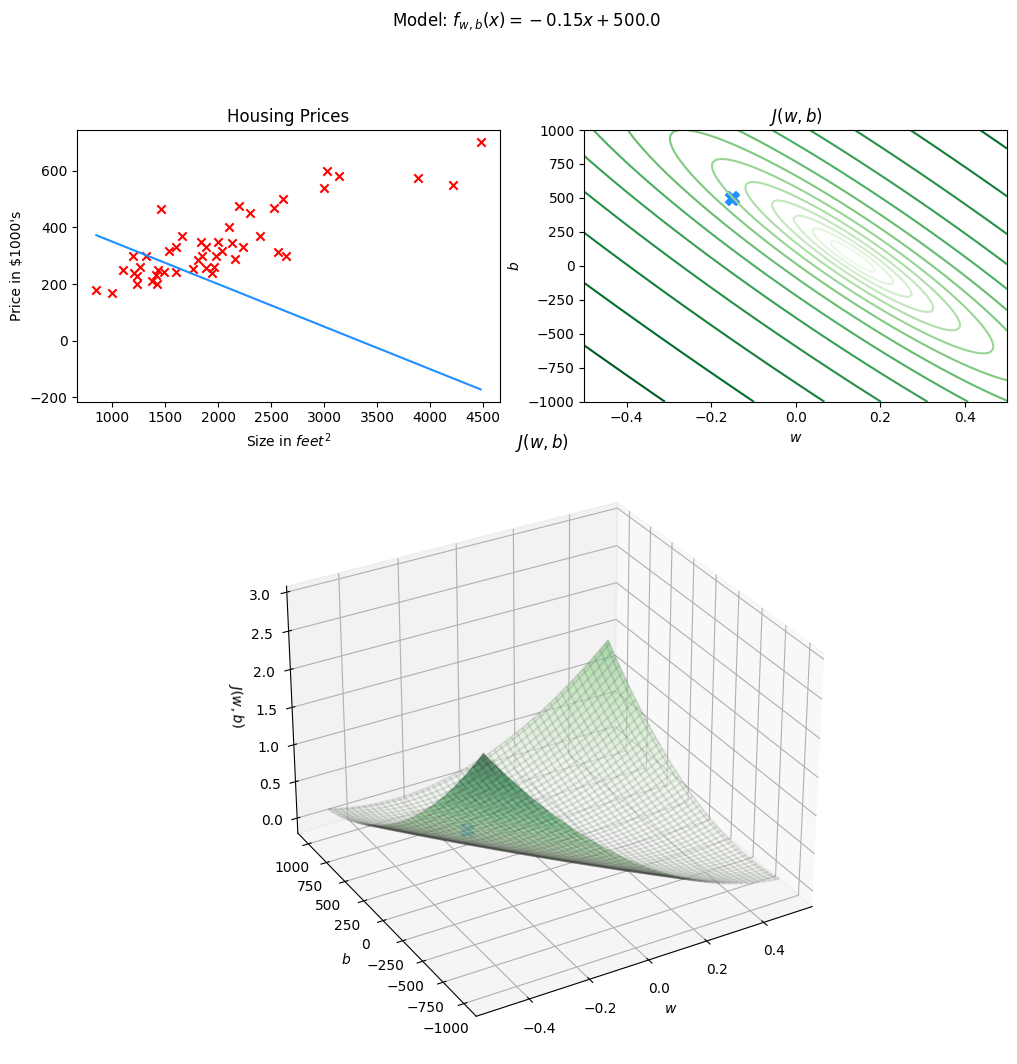

In [30]:
w = -0.15
b = 500

plot_portland_housing(x_train, y_train, w, b)

### 1.1.3.7 Lab: Cost function

#### Problem Statement

You would like a model which can predict housing prices given the size of the house.
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \$300,000 and a house with 2000 square feet sold for \$500,000.

In [31]:
x_train_2 = np.array([1.0, 2.0])
y_train_2 = np.array([300.0, 500.0])

#### Computing Cost

Don't confuse **cost** with the housing cost. The term **price** is used for that. Cost is a measure of how well our model is predicting the target price of the house.

The equation for cost with one variable is shown below. Note that we are summning from $i=0$ to $m-1$ since Python uses zero-based indexing.

$$
J(w,b) = \frac{1}{2m}\sum_{i=0}^{m - 1}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}
$$

where

$$
f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b
$$

#### Helper Functions for Cost Function Intuition: `plt_intuition()`

In [32]:
# the model
def f_wb(x, w, b):
    return np.dot(w, x) + b

# test
f_wb(x_train_2, 200, 100)

array([300., 500.])

In [33]:
# compute cost
def J_wb(x, y, w, b):
    m = x.shape[0]
    return sum(((np.dot(w, x) + b) - y)**2) / (2 * m)

# test the function
J_wb(x_train_2, y_train_2, 200, 100)

0.0

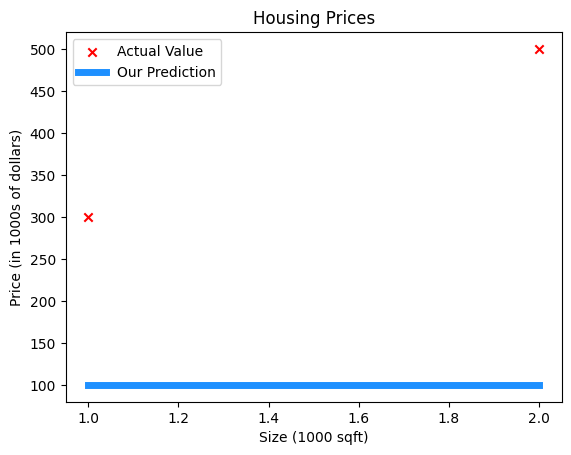

In [34]:
def plt_house_x(X, y, f_wb_data=None, ax=None):
    if not ax:
        fig, ax = plt.subplots(1, 1)

    ax.scatter(X, y, marker='x', c='r', label='Actual Value', zorder=4)

    ax.set_title('Housing Prices')
    ax.set_xlabel('Size (1000 sqft)')
    ax.set_ylabel('Price (in 1000s of dollars)')

    if f_wb_data is not None:
        ax.plot(X, f_wb_data, c='dodgerblue', linewidth=5, label='Our Prediction')

    ax.legend()

# test the function
f_wb_data = f_wb(x_train_2, 0, 100)
plt_house_x(x_train_2, y_train_2, f_wb_data)

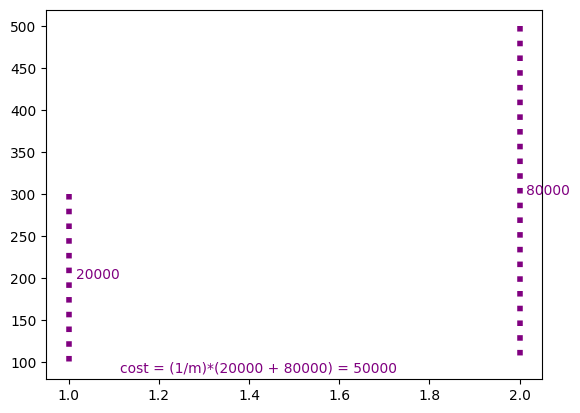

In [35]:
def mk_cost_lines(x, y, w, b, ax):
    ''' makes vertical cost lines '''
    cstr = 'cost = (1/m)*('
    ctot = 0
    label = 'cost for point'
    addedbreak = False

    for p in zip(x, y):
        # f_wb_p calculates the predicted values
        #   that are vertically aligned with the
        #   actual values
        f_wb_p = w * p[0] + b
        # c_p is the cost for the point
        c_p = ((f_wb_p - p[1])**2) / 2

        # draws the cost lines (aka residual lines)
        ax.vlines(p[0], p[1], f_wb_p,
                lw=4, color='purple', ls='dotted', label=label)
        label='' # prevents legend from repeating the label
        cxy = [p[0], p[1] + (f_wb_p - p[1]) / 2]
        ax.annotate(f'{c_p:0.0f}',
                    xy=cxy,
                    xycoords='data',
                    color='purple',
                    xytext=(5, 0),
                    textcoords='offset points')
        cstr += f'{c_p:0.0f} + '
        if len(cstr) > 38 and addedbreak is False:
            cstr += '\n'
            addedbreak = True
        ctot += c_p

    ctot = ctot / len(x)
    cstr = cstr[:-3] + f') = {ctot:0.0f}'
    ax.text(0.15, 0.02, cstr, transform=ax.transAxes, color='purple')

# test the function
fig, ax = plt.subplots(1)
mk_cost_lines(x_train_2, y_train_2, 0, 100, ax)

#### Cost Function Intuition

In [36]:
def plt_intuition(x_train, y_train):

    w_range = np.array([0,400])
    tmp_b = 100

    w_array = np.arange(*w_range, 5)
    cost = np.zeros_like(w_array)

    for i, w in enumerate(w_array):
        cost[i] = J_wb(x_train, y_train, w, tmp_b)

    @interact(w=(*w_range, 10), continuous_update=False)
    def func(w = 150):
        f_wb_data = f_wb(x_train, w, tmp_b)

        fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8, 4))

        mk_cost_lines(x_train, y_train, w, tmp_b, ax[0])
        plt_house_x(x_train, y_train, f_wb_data = f_wb_data, ax=ax[0])

        ax[1].plot(w_array, cost, c='dodgerblue', linewidth=5)
        cur_cost = J_wb(x_train, y_train, w, tmp_b)
        ax[1].scatter(w, cur_cost, s=100, color='red', zorder=10,
                      label=f'cost at w={w}')
        ax[1].hlines(cur_cost, ax[1].get_xlim()[0],
                     w, lw=4, color='purple', ls='dotted')
        ax[1].vlines(w, ax[1].get_ylim()[0], cur_cost,
                     lw=4, color='purple', ls='dotted')
        ax[1].set_title("Cost vs. w, (b fixed at 100)")
        ax[1].set_ylabel('Cost')
        ax[1].set_xlabel('w')
        ax[1].legend(loc='upper center')

        fig.suptitle(f'Minimize Cost: Current Cost = {cur_cost:0.0f}',
                     fontsize=12)

        plt.show()

In [37]:
plt_intuition(x_train_2, y_train_2)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

Notes about the above plot:

- We already know from the previous lab that the cost is minimized when $b = 100$, so $b$ remains constant at that value
- Cost is minimized when $w = 200$
- Because the difference between the target and prediction is squared in the cost equation, the cost increases rapidly when $w$ gets too large or too small

#### Cost Function Intuition: 3D

- here we use a larger data set
- we also use data points that don't all fall on a line (the minimum value of the cost function will never be 0)
-  https://colab.research.google.com/drive/1YA_yvcCsFFgOcwNtXSYghZNlfl2IZwSJ

## 1.1.4 Train the model with gradient descent

### 1.1.4.1 Gradient descent

- Can be used to minimize any function, not just a cost function for linear regression
- It works with more general functions, including other cost functions that work with models with more than two parameters
- **Cost function**:
 - $J(w,b)$
 - $J(w_1, w_2, ..., w_n, b)$
- **Goal**:
 - $\min_{w,b}J(w,b)$
 - $\min_{w_1, w_2, ..., w_n, b}J(w_1, w_2, ..., w_n, b)$

#### Outline of steps

1. Start with some $w,b$
    - a common choice is to set both to 0
2. Keep changing $w,b$ to reduce $J(w,b)$
3. Until we settle at or near a minimum
    - note that some functions may have local minima
    - the cost function has only a global minimum

### 1.1.4.2 Implementing gradient descent

#### Gradient descent algorithm

$$
\begin{align}
w &= w - \alpha \cdot \frac{\partial}{\partial w} J(w,b) \\
b &= b - \alpha \cdot \frac{\partial}{\partial b} J(w,b)
\end{align}
$$

- these steps are repeated until the algorithm converges
    - converges means a point at a local minima has been reach where the parameters $w$ and $b$ no longer change much with each additional step you take

- $\alpha$
    - this is the **learning rate**
    - usually a small number between 0 and 1
    - in combination with the magnitude of the derivative, it controls how big of a step is taken downhill
        - larger $\alpha$ means bigger step
- $\frac{\partial}{\partial w} J(w,b)$
    - the **derivative** term of the cost function $J$
    - determines the direction of the baby step taken down the hill

- **important subtle detail** about the correct implementation of gradient descent: $w,b$ are updated **simultaneously**

##### Correct: Simultaneous update

$$
\begin{align}
&\text{tmp_w} = w - \alpha \cdot \frac{\partial}{\partial w} J(w,b) \\
&\text{tmp_b} = b - \alpha \cdot \frac{\partial}{\partial b} J(w,b) \\
&w = \text{tmp_w} \\
&b = \text{tmp_b}
\end{align}
$$

##### Incorrect

$$
\begin{align}
&\text{tmp_w} = w - \alpha \cdot \frac{\partial}{\partial w} J(w,b) \\
&w = \text{tmp_w} \\
&\text{tmp_b} = b - \alpha \cdot \frac{\partial}{\partial b} J(w,b) \\
&b = \text{tmp_b}
\end{align}
$$

### 1.1.4.3 Gradient descent intuition

#### A simplified example, $b=0$

- **model**: $f_{w,b}\left(x\right) = wx$
 - **$f$**: defines a line that goes through the origin
- **parameters**: $w$
- **cost function**: $J(w) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w}\left(x^{(i)}\right) - y^{(i)}\right)^{2}$
 - **$J(w)$**: the cost function is a parabola
- **goal**: $\min_{w} J(w)$
- **Gradient descent**: $w = w - \alpha \cdot \frac{\partial}{\partial w} J(w)$

##### The derivative term: positive or negative?

Recall that the derivative is just the slope of the tangent line at a particular value for $w$. Also note that the learning rate, $\alpha$, is always a positive number.

- When $\frac{\partial}{\partial w} J(w) > 0$:
 - $w = w - \alpha \cdot \frac{\partial}{\partial w} J(w)$ makes $w$ smaller
- When $\frac{\partial}{\partial w} J(w) < 0$:
 - $w = w - \alpha \cdot \frac{\partial}{\partial w} J(w)$ makes $w$ larger

### 1.1.4.4 Learning rate

- The choice of the learning rate, $\alpha$ has a huge impact on the efficiency of your implementation of gradient descent
- If $\alpha$ is chosen poorly, the algorithm may not even work
- **$\alpha$ is too small**:
    - gradient deccent will work, but it will be very slow
- **$\alpha$ is too big**:
    - may overshoot and never reach the minimum
    - gradient descent may fail to coverge and it may even diverge
- When you are already at the minimum, the slope is zero, so the derivative term is equal to zero, so there is no change with further gradient descent iterations
- As we approach a minium, the bottom of the bowl, the derivative term gets closer and closer to zero
    - the steps get smaller automatically even with a **fixed learning rate**

### 1.1.4.5 Gradient descent for linear regression

#### Linear regression model

$
f_{w,b} = wx + b
$

#### Cost function

$
J(w,b) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}
$

#### Gradient descent algorithm

$
\text{repeat until convergence \{} \\
\> w = w - \alpha \cdot \frac{\partial}{\partial w} J(w,b) \\
\> b = b - \alpha \cdot \frac{\partial}{\partial b} J(w,b)\\
\text{\}}
$

#### Sum Rule of Derivatives

$
\frac{d}{dx} \left(f\left(x\right) + g\left(x\right)\right) = \frac{d}{dx} f\left(x\right) + \frac{d}{dx} g\left(x\right)
$

 #### The derivative term

$
\begin{align}
\frac{\partial}{\partial w} J(w,b) &= \frac{\partial}{\partial w} \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2} \\
&= \frac{\partial}{\partial w} \frac{1}{2m}\sum_{i=1}^{m}\left(wx^{(i)} + b - y^{(i)}\right)^{2} \\
&= \frac{1}{2m} \sum_{i=1}^{m} 2\left(wx^{(i)} + b - y^{(i)}\right) x^{(i)} \\
&= \frac{1}{m} \sum_{i=1}^{m} \left(wx^{(i)} + b - y^{(i)}\right) x^{(i)} \\
&= \frac{1}{m} \sum_{i=1}^{m} \left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right) x^{(i)}
\end{align}
$

$
\begin{align}
\frac{\partial}{\partial b} J(w,b) &= \frac{\partial}{\partial b} \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2} \\
&= \frac{\partial}{\partial b} \frac{1}{2m}\sum_{i=1}^{m} \left(wx^{(i)} + b - y^{(i)}\right)^{2} \\
&= \frac{1}{2m}\sum_{i=1}^{m}2\left(wx^{(i)} + b - y^{(i)}\right)\cdot 1 \\
&= \frac{1}{m}\sum_{i=1}^{m}\left(wx^{(i)} + b - y^{(i)}\right) \\
&= \frac{1}{m} \sum_{i=1}^{m} \left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)
\end{align}
$

##### Confirm results with `sympy`

In [38]:
x, y, w, b, m = sym.symbols('x y w b m')

derivative_term = (1/(2*m)) * (w * x + b - y) **2
derivative_term

(b + w*x - y)**2/(2*m)

In [39]:
derivative_term.diff(w)

x*(b + w*x - y)/m

In [40]:
derivative_term.diff(b).simplify()

(b + w*x - y)/m

#### Gradient descent algorithm with derivative term worked out

$
\text{repeat until convergence \{} \\
\> w = w - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right) x^{(i)} \\
\> b = b - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right) \\
\text{\}}
$

#### A simplified example, $b=0$

- **model**: $f_{w}\left(x\right) = wx$
- **parameters**: $w$
- **cost function**: $J(w) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w}\left(x^{(i)}\right) - y^{(i)}\right)^{2}$
- **goal**: $\min_{w} J(w)$
- **$f$**: defines a line that goes through the origin
- **Gradient descent**: $w = w - \alpha \cdot \frac{\partial}{\partial w} J(w)$

#### Simplified Gradient: $(b = 0)$

$
\begin{align}
\frac{\partial}{\partial w}J(w) &= \frac{\partial}{\partial w} \frac{1}{2m} \sum_{i=1}^{m}\left(f_{w}\left(x^{(i)}\right) - y^{(i)}\right)^{2} \\
&= \frac{\partial}{\partial w} \frac{1}{2m} \sum_{i=1}^{m}\left(wx^{(i)} - y^{(i)}\right)^{2} \\
&= \frac{1}{2m} \sum_{i=1}^{m} 2 \left(wx^{(i)} - y^{(i)}\right)x^{(i)} \\
&= \frac{1}{m} \sum_{i=1}^{m} \left(wx^{(i)} - y^{(i)}\right)x^{(i)} \\
&= \frac{1}{m} \sum_{i=1}^{m} \left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)x^{(i)}
\end{align}
$

In [41]:
training_data

,x,y
0,1,1
1,2,2
2,3,3


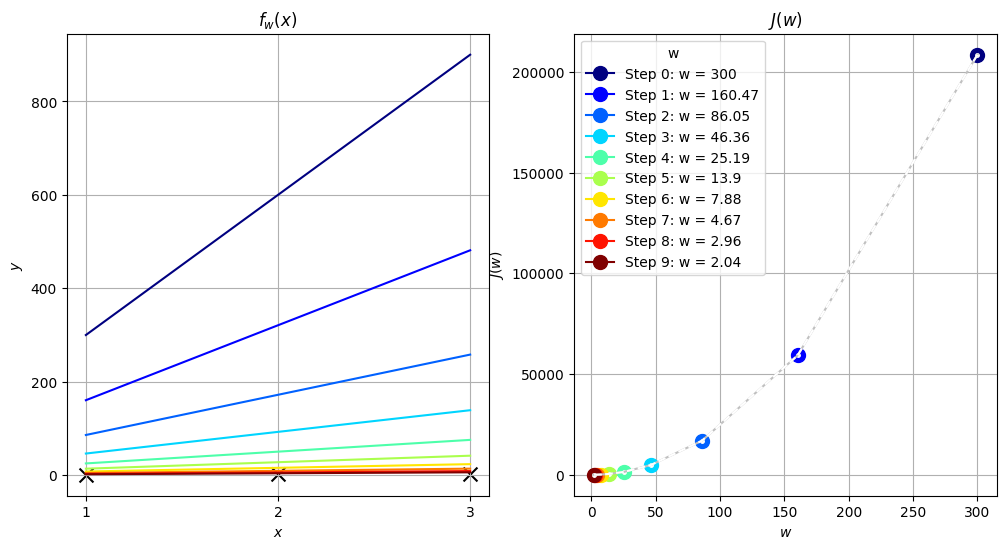

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_xticks([0, 1, 2, 3])
ax1.grid()
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('$f_w(x)$')

ax2.grid()
ax2.set_xlabel('$w$')
ax2.set_ylabel('$J(w)$')
ax2.set_title('$J(w)$')

feature = training_data['x'].values
target = training_data['y'].values

# plot training set
ax1.scatter(feature, target,
            marker='x', color='black', s=100)

# model
f = lambda w: w * feature

# cost function
m = len(training_data)
J = lambda w: (1/(2*m)) * sum((f(w) - target)**2)
J_alt = lambda w: (1/6) * (14 * w**2 - 28 * w + 14)

# cost function derivative
J_prime = lambda w: (1/m) * sum((f(w) - target) * feature)
J_prime_alt = lambda w: (1/6) * (28 * w - 28)

# different colour for each step
num_steps = 10
colors = plt.cm.jet(np.linspace(0, 1, num_steps))

# initialize w: experiment with positive and negative values
w = 300
# experiment with different values of alpha
# alpha = 0.001
alpha = 0.1 # Goldilocks
#alpha = 0.5 # too big

# plot the model in ax1
# plot the value returned by the cost function in ax2
ws = [w]
for s in range(0, num_steps):
    ax1.plot(feature, f(w), c=colors[s])
    ax2.plot(w, J(w), marker='.', markersize=20, color=colors[s],
             label=f'Step {s}: w = {round(w, 2)}')
    ax2.plot(w, J_alt(w), marker='.', color='white', markersize=5)
    w = w - alpha * J_prime(w)
    ws.append(w)

# plot the continuous cost function
ax2.plot(ws, [J(w) for w in ws], color='silver')
ax2.plot(ws, J_alt(np.array(ws)), linestyle='--', color='white')

plt.legend(title='w')
plt.show()

### 1.1.4.6 Running gradient descent

- **Batch gradient descent**: each step of the gradient descent uses all the training examples (not just a subset)

https://colab.research.google.com/drive/1zCaNQ_rZIt-GY_j086ZZbGXxLSYfn6Zu#scrollTo=1U1ljadkE3Ce

### 1.1.4.7 Gradient Descent Lab

https://colab.research.google.com/drive/1aL0WjISuYW8SRloHlMnWDwwYQ9QvYNDP